In [15]:
import numpy as np
import matplotlib.pyplot as plt


def gaussian_line(wv, wv0, sigma):
    """Gaussian line profile"""
    return 1 - np.exp(-0.5 * (wv - wv0) ** 2 / sigma**2)


wv = np.linspace(642.0, 644.0, 600) * 1e-9
spectrum = lambda wv: gaussian_line(wv, np.mean(wv), 0.05 * 1e-9)

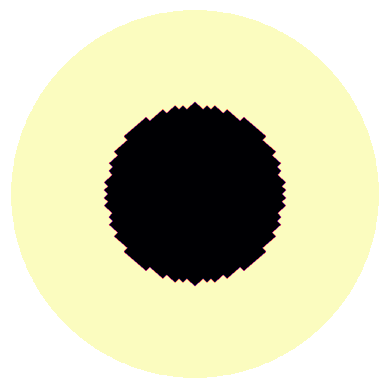

In [19]:
from spotter import Star

star = Star(N=2**5, spectrum=spectrum, wv=wv, veq=100000)

star.add_spot(np.pi / 2, 0.0, 0.5, 0.1)
star.show()

In [20]:
import jax

phases = np.linspace(0, np.pi / 2, 10)
spectra = jax.vmap(star.jax_spectrum())

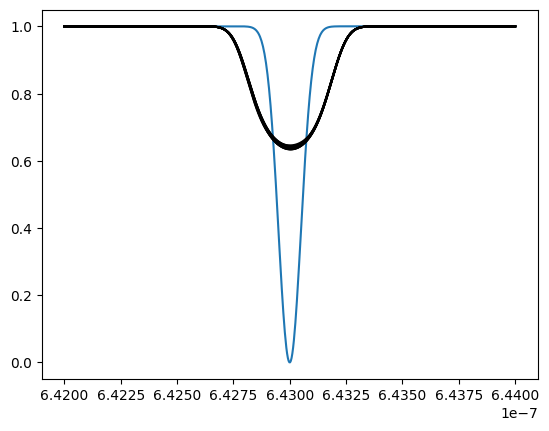

In [21]:
plt.plot(wv, spectrum(wv))
plt.plot(wv, spectra(phases).T, color="k")